# YouTube Analysis using comments, views, likes, etc based on  Movie Lens dataset

In [1]:
# Declaring important Libraries

import pandas as pd
from googleapiclient.discovery import build
api_key= 'AIzaSyCet1RHeGn4t-f8uvGA_DBSJ6R-KQeaayI4'
youtube = build('youtube', 'v3', developerKey=api_key)
from googleapiclient.errors import HttpError
import time

import matplotlib.pyplot as plt

C:\Users\varsh\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\varsh\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\varsh\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
# Create an empty DataFrame to store the data

data = pd.DataFrame(columns=["Video ID", "Title", "View count", "Like count", "Dislike count", "Comment count", "Description", "Duration", "Duration_sec", "Favorite count","Comment No.","Comment"])
incorrect_ids  = []

def converting_to_seconds(duration_str):
    if not duration_str or "M" not in duration_str or "S" not in duration_str:
        return 0
    
    duration_str = duration_str.replace("PT", "").replace("S", "")
    
    
    if "H" in duration_str:
        hours, duration_str = duration_str.split("H")
    else:
        hours = 0
    if "M" in duration_str:
        minutes, seconds = duration_str.split("M")
    else:
        minutes, seconds = 0, 0
        
        
    if not minutes or not seconds:
        return 0
    total_seconds = int(hours) * 3600 + int(minutes) * 60 + int(seconds)
    return total_seconds

for index, row in data.iterrows():
    video_id = row["youtubeId"]
    i=1
    try:
        # retrieve the video statistics
        video_response = youtube.videos().list(
            part="snippet,statistics",
            id=video_id
        ).execute()

        # retrieve the top 100 comments for the video
        comment_response = youtube.commentThreads().list(
            part="snippet",
            videoId=video_id,
            textFormat="plainText",
            order="relevance",
            maxResults=10
        ).execute()

        # duration for the video
        duration_response = youtube.videos().list(
            part='contentDetails',
            id=video_id
        ).execute()

        # video statistics and comments to the DataFrame
        for video in video_response["items"]:
            statistics = video["statistics"]
            snippet = video["snippet"]

            duration = duration_response['items'][0]['contentDetails']['duration']

            duration_of_seconds = converting_to_seconds(duration)

        for comment in comment_response["items"]:
            text = comment["snippet"]["topLevelComment"]["snippet"]["textDisplay"]
            
            data = data.append({
                "Video ID": video_id,
                'Titles':row['title'],
                "View counts": statistics.get("viewCount", 0),
                "Like counts": statistics.get("likeCount", 0),
                "Dislike counts": statistics.get("dislikeCount", 0),
                "Comment counts": statistics.get("commentCount", 0),
                "Descriptions": snippet.get("description", "N/A"),
                "Durations": duration,
                "Duration_secs":duration_of_seconds,
                "Favorite counts": statistics.get("favoriteCount", 0),
                "Comment Nos.":i,
                "Comments": text
            }, ignore_index=True)
            i+=1

    except HttpError as e:
        x=e.resp.status
        row_data = {
                   'youtubeId':row['youtubeId'],
                   'movieId':row['movieId'],
                   'title':row['title'],
                   'Error':x
                   }
        incorrect_ids.append(row_data)

dataz=pd.DataFrame(incorrect_ids)

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append meth

C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
C:\Users\vinee\AppData\Local\Temp/ipykernel_22100/1016865457.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({


In [6]:
# Checking size of the Data with Bad Video IDs
dataz.shape

(23180, 4)

In [9]:
#Creating Subset of datax to find answers to the Question of Assignment.
subset_datax = data.drop('Comment', axis=1).drop_duplicates(subset='Video ID')

In [10]:
# Check size of subset_datax
subset_datax.shape

(2329, 11)

In [11]:
# Review head of subset_datax
subset_datax.head()

Video ID                           Title View count Like count  \
0   rEnOoWs3FuA         Grumpier Old Men (1995)     198213        218   
8   2GfZl4kuVNI                     Heat (1995)    1326794       7165   
18  -C-xXZyX2zU             Tom and Huck (1995)     191717        264   
28  lcOqUE0u1LM                GoldenEye (1995)     336172       1907   
38  UrC75wUKoFM  American President, The (1995)      14958         23   

   Dislike count Comment count  \
0              0            13   
8              0           606   
18             0            94   
28             0           167   
38             0             1   

                                          Description Duration Duration_sec  \
0   The more things change, the more they stay the...  PT1M52S          112   
8   Director: Michael Mann.\nCast: Al Pacino, Robe...  PT2M28S          148   
18  A preview for this 90s disney movie. From the ...     PT1M            0   
28  Release Date: November 13, 1995\n\nPierce Bros...  PT2M52S          172   
38  Subscribe to MovieTrailersByVD: http://bit.ly/...  PT2M50S          170   

   Favorite count Comment No.  
0               0           1  
8               0           1  
18              0           1  
28              0           1  
38              0           1

In [12]:
# Top 10 videos in subset_datax on most view count
subset_datax['View count'] = subset_datax['View count'].astype(int)
top_10 = subset_datax.nlargest(10, 'View count')
print(top_10.loc[:, ['Title','View count']])

                                          Title  View count
9212                            High Art (1998)    19685025
15143                          RoboCop 2 (1990)    12159460
8952          Live Flesh (Carne trémula) (1997)     7441951
2892     Nightmare Before Christmas, The (1993)     7041771
14982                         Fight Club (1999)     6817496
1499                        Pulp Fiction (1994)     6784247
18303            Idiots, The (Idioterne) (1998)     6667653
15240  Princess Mononoke (Mononoke-hime) (1997)     6654968
4280                      Godfather, The (1972)     5583470
18196                    Third World Cop (1999)     5490034


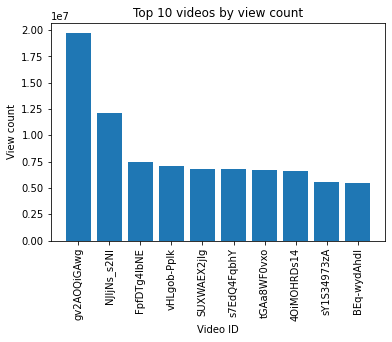

In [13]:
# Top 10 videos in subset_datax on most view count


plt.bar(top_10['Video ID'], top_10['View count'])
plt.xticks(rotation=90)
plt.xlabel('Video ID')
plt.ylabel('View count')
plt.title('Top 10 videos by view count')
plt.show()

In [14]:
# Bottom 10 videos based on view count

subset_datax['View count'] = subset_datax['View count'].astype(int)
top_10 = subset_datax.nsmallest(10, 'View count')


print(top_10.loc[:, ['Title', 'View count']])

                                           Title  View count
1320                           Just Cause (1995)           0
2452                        House Party 3 (1994)           0
5948                    Full Metal Jacket (1987)           0
6718        Blood and Wine (Blood & Wine) (1996)           0
11431      2010: The Year We Make Contact (1984)           0
15980              End of the Affair, The (1955)           0
16282                               Trans (1998)         694
14272                               Rosie (1998)         737
3698                             Low Life (1994)         831
10259  Seventh Heaven (Septième ciel, Le) (1997)        1188


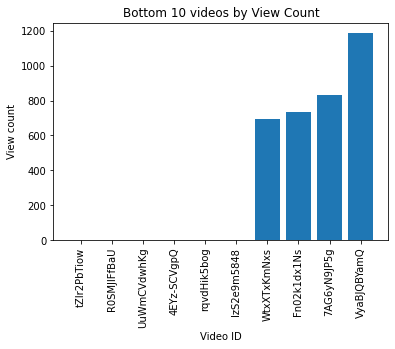

In [15]:
# Bottom 10 videos based on view count
import matplotlib.pyplot as plt

plt.bar(top_10['Video ID'], top_10['View count'])
plt.xticks(rotation=90)
plt.xlabel('Video ID')
plt.ylabel('View count')
plt.title('Bottom 10 videos by View Count')
plt.show()

In [16]:
#Title - Most Liked Video
subset_datax['Like count'] = subset_datax['Like count'].astype(int)
Most_Liked = subset_datax.nlargest(1, 'Like count')
print(Most_Liked.loc[:, ['Title', 'Like count']])

                  Title  Like count
15143  RoboCop 2 (1990)       94331


In [17]:
# Title - Least Liked Video
subset_datax['Like count'] = subset_datax['Like count'].astype(int)
Least_Liked = subset_datax.nsmallest(1, 'Like count')
print(Least_Liked.loc[:, ['Title', 'Like count']])

                                 Title  Like count
39  Dracula: Dead and Loving It (1995)           0


In [18]:
# Title - video in highest Duration
subset_datax['Duration_sec'] = subset_datax['Duration_sec'].astype(int)
Highest_duration = subset_datax.nlargest(1, 'Duration_sec')
print(Highest_duration.loc[:, ['Title', 'Duration','Duration_sec']])

                  Title    Duration  Duration_sec
10995  Blackmail (1929)  PT2H44M47S          9887


In [19]:
# Sentiment Analysis here
from textblob import TextBlob

# calculate polarity score
polarity_scores = []
for comment in data['Comment']:
    blob = TextBlob(comment)
    polarity_scores.append(blob.sentiment.polarity)

# polarity scores 
data['Comment Polarity'] = polarity_scores

In [20]:
data.head()

Video ID                    Title View count Like count Dislike count  \
0  rEnOoWs3FuA  Grumpier Old Men (1995)     198213        218             0   
1  rEnOoWs3FuA  Grumpier Old Men (1995)     198213        218             0   
2  rEnOoWs3FuA  Grumpier Old Men (1995)     198213        218             0   
3  rEnOoWs3FuA  Grumpier Old Men (1995)     198213        218             0   
4  rEnOoWs3FuA  Grumpier Old Men (1995)     198213        218             0   

  Comment count                                        Description Duration  \
0            13  The more things change, the more they stay the...  PT1M52S   
1            13  The more things change, the more they stay the...  PT1M52S   
2            13  The more things change, the more they stay the...  PT1M52S   
3            13  The more things change, the more they stay the...  PT1M52S   
4            13  The more things change, the more they stay the...  PT1M52S   

  Duration_sec Favorite count Comment No.  \
0          112              0           1   
1          112              0           2   
2          112              0           3   
3          112              0           4   
4          112              0           5   

                                             Comment  Comment Polarity  
0          I'm watching this now, it never gets old🤣          0.000000  
1  Well, there was supposed to be another sequel....          0.068182  
2  I was looking for halloween themed movies and ...          0.000000  
3                                      Canaloni !!!!          0.000000  
4  i loved the first one is it like the first one...          0.400000

In [21]:
# Final result
sorted_df = data.sort_values(['Video ID', 'Comment Polarity'], ascending=[False, True])

unique_df = sorted_df.drop_duplicates(subset='Video ID', keep='first')

top_videos = unique_df.sort_values('Comment Polarity', ascending=False).head(10)

# printing the top 10 videos
print(top_videos[['Video ID', 'Comment','Comment Polarity']])

          Video ID                                            Comment  \
18444  Z2eAvi4l0Zs                            Welcome to CASTLEVANIA!   
1606   fWoyGukz1ag                                      Great movie!!   
16905  6UTZTKoZmM8  Wot a nice guy , giving that guy a dig of his ...   
11098  1xTC6UYgGSs                  Shes sooo beautiful in this film!   
16191  cC2rkQThgX0  GREAT WARNER HOME VIDEO (1999 ) TEASER VHS CAP...   
3242   z7tbO3dwri0  It seems to be an excellent movie!!!!\nI would...   
5642   R8mK-_EPxdk                                      Excellent gem   
2073   EvrELWjSxUU                              i love this movie!!!!   
9051   aA1xyJIwykg  I did the best drift ever in front of that chu...   
13562  U7bQ_HrnKRE  Post. She still looks great today. A very, ver...   

       Comment Polarity  
18444               1.0  
1606                1.0  
16905               1.0  
11098               1.0  
16191               1.0  
3242                1.0  
5642          